# Charlier Series

From Wolfram Mathworld, http://mathworld.wolfram.com/CharlierSeries.html

A class of formal series expansions in derivatives of a distribution $\Psi(t)$ which may (but need not) be the normal distribution function

$$
\Phi(t)=\frac{1}{\sqrt{2\pi}} e^{-t^2/2}
$$

and moments or other measured parameters. Edgeworth series are known as the Charlier series or Gram-Charlier series.
Let $\psi(t)$ be the characteristic function of the function $\Psi(t)$, and $\gamma_r$ its cumulants. Similarly, let $F(t)$ be the distribution to be approximated,  $f(t)$ its characteristic function, and $\kappa_r$ its cumulants. By definition, these quantities are connected by the formal series

$$
f(t)=\exp\left[\sum_{r=1}^\infty(\kappa_r-\gamma_r)\frac{(it)^r}{r!}\right] \psi(t)
$$

(Wallace 1958). Integrating by parts gives $(it)^r \psi(t)$ as the characteristic function of $(-1)^r \Psi^{(r)}(x)$, so the formal identity corresponds pairwise to the identity

$$
F(x)=\exp\left[\sum_{r=1}^\infty(\kappa_r-\gamma_r) \frac{(-D)^r}{r!}\right] \Psi(x), 
$$

where D is the differential operator. The most important case $\Psi(t)=\Phi(t)$ was considered by Chebyshev (1890), Charlier (1905-06), and Edgeworth (1905).

Expanding and collecting terms according to the order of the derivatives gives the so-called Gram-Charlier A-Series, which is identical to the formal expansion of $F-\Psi$ in Hermite polynomials. The A-series converges for functions $F$ whose tails approach zero faster than  $\Psi^{'1/2}$ (Cramér 1925, Wallace 1958, Szegö 1975).

# Edgeworth Series

From Wolfram Mathworld, http://mathworld.wolfram.com/EdgeworthSeries.html

Let a distribution to be approximated be the distribution $F_n$ of standardized sums

$$
Y_n=\frac{ \sum_{i=1}^n (X_i-X)}{\sqrt{\sum_{i=1}^n \sigma_X^2}}.
$$

In the Charlier series, take the component random variables identically distributed with mean $\mu$, variance $\sigma^2$, and higher cumulants $\sigma^r \lambda_r$ for $r>=3$.
Also, take the developing function $\Psi(t)$ as the standard normal distribution function $\Phi(t)$, so we have

\begin{align}
\kappa_1-\gamma_1	&=	0	\\
\kappa_2-\gamma_2	&=	0	\\
\kappa_3-\gamma_3	&=	\frac{\lambda^r}{n^{r/2-1}}.
\end{align}

Then the Edgeworth series is obtained by collecting terms to obtain the asymptotic expansion of the characteristic function of the form

$$
f_n(t)=\left[1+\sum_{r=1}^\infty \frac{P_r(it)}{n^{r/2}}\right]e^{-t^2/2}, 
$$

where $P_r$ is a polynomial of degree $3r$ with coefficients depending on the cumulants of orders $3$ to $r+2$. If the powers of $\Psi$ are interpreted as derivatives, then the distribution function expansion is given by

$$
F_n(x)=\Psi(x)+\sum_{r=1}^\infty \frac{P_r(-\Phi(x))}{n^{r/2}}
$$

# Edgeworth Series from Wikipedia

$$
{\displaystyle X_{n}={\frac {1}{\sqrt {n}}}\sum _{i=1}^{n}{\frac {Z_{i}-\mu }{\sigma }}.}
$$

Let $F_{n}$ denote the cumulative distribution functions of the variables $X_{n}$. Then by the central limit theorem,

$$
\lim_{n\to\infty} F_n(x) = \Phi(x) \equiv \int_{-\infty}^x \tfrac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}q^2}dq
$$
  
for every $x$, as long as the mean and variance are finite.

for every {\displaystyle x} x, as long as the mean and variance are finite.

Now assume that, in addition to having mean $\mu$ and variance $\sigma ^{2}$, the i.i.d. random variables $Z_{i}$
have higher cumulants $\displaystyle \kappa _{r}$.
From the additivity and homogeneity properties of cumulants, the cumulants of $X_{n}$ in terms of the cumulants of $Z_{i}$ are for $r \geq 2$,

$$
{\displaystyle \kappa _{r}^{F_{n}}={\frac {n\kappa _{r}}{\sigma ^{r}n^{r/2}}}={\frac {\lambda _{r}}{n^{r/2-1}}}\quad \mathrm {where} \quad \lambda _{r}={\frac {\kappa _{r}}{\sigma ^{r}}}.}
$$

If we expand in terms of the standard normal distribution, that is, if we set

\begin{equation}
\phi (x)={\frac {1}{\sqrt {2\pi }}}\exp\left(-{\frac {1}{2}}x^{2}\right)
\end{equation}

## Edgeworth Series Terms calculation

Intuitions from http://personal.psu.edu/drh20/asymp/fall2004/lectures/edgeworth.pdf

We observe that the $k$-th derivative of the term $\phi(x)$ is important, so

$$
\phi^{(k)}(x) = \frac{d^k \phi(x)}{dx^k}.
$$

Let's expand first few terms!

\begin{align}
\phi^{(1)}(x) &= -\frac{x}{\sqrt{2\pi}} \exp\left(-\frac 12 x^2\right) \\
\phi^{(2)}(x) &= -\frac{1 - x^2}{\sqrt{2\pi}} \exp\left(-\frac 12 x^2\right) \\
\phi^{(3)}(x) &= -\frac{3 - x^3}{\sqrt{2\pi}} \exp\left(-\frac 12 x^2\right)
\end{align}

Thankfully, we do not need to do all the math ourselves. the polynomial part of $\phi(x)$ is known to be the Hermite polynomial, which can be calculated with `numpy.polynomial.hermite` in arbitrary degree.

Edgeworth series is just a series of functions whose $n$-th term is

$$
\phi^{(n)}(x) = \frac{d^k \phi(x)}{dx^k} = H_n(x) \exp\left(-\frac 12 x^2\right)
$$

where $a_n$ is the scale parameter, $H_n(x)$ is the $n$-th term of Hermite series.
It means

$$
F(x) = \sum_{i=0}^n a_n H_n(x) \exp\left(-\frac 12 x^2\right)
$$

In [27]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
import numpy.polynomial.hermite
%matplotlib inline

In [2]:
# Manual calculation of first few terms
def phi(x):
    return np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
def phi1(x):
    return -x * np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
def phi2(x):
    return -(1 - x ** 2) * np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)
def phi3(x):
    return -(3 * x - x ** 3) * np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)

# Arbitrary mix of Hermite polynomial
def phi_n(x,c):
    return numpy.polynomial.hermite.hermval(x, c) * np.exp(-x ** 2 / 2) / np.sqrt(2 * np.pi)

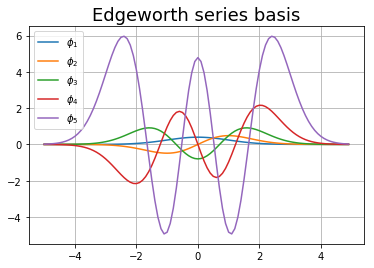

In [122]:
x = np.arange(-5,5,.1)
#plt.plot(x, np.vstack([phi(x), phi1(x), phi2(x), phi3(x)]).T)
plt.plot(x, np.vstack([phi_n(x,[1]), phi_n(x,[0,1]), phi_n(x,[0,0,1]), phi_n(x,[0,0,0,1]), phi_n(x,[0,0,0,0,1])]).T)
plt.legend(['$\phi_1$','$\phi_2$','$\phi_3$','$\phi_4$','$\phi_5$'], loc='upper left')
plt.title('Edgeworth series basis', fontsize=18)
plt.grid()
plt.savefig('edgeworth.png')

In [4]:
def edgeworth(x, c):
    return phi_n(x, c)

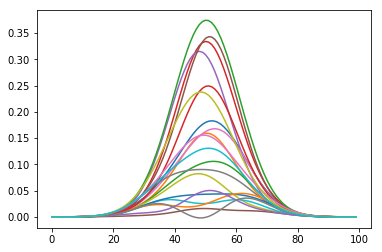

In [5]:
for i in np.random.rand(20,5):
    ab = i * np.exp(-np.linspace(0,7,len(i)))
    # Randomly flip the sign for odd term only (to compensate bias)
    ab[np.arange(0,len(ab)//2)*2+1] *= np.random.rand(len(ab)//2) - .5
    plt.plot(edgeworth(x, ab))

In [62]:
def loadspc(path):
    en = []
    inten = []
    first = True
    with open(path) as f:
        for line in f.readlines():
            if first:
                first = False
                continue
            words = line.split()
            en.append(float(words[0]))
            inten.append(float(words[1]))
    return en, inten

In [64]:
en, inten = loadspc(r'C:\XRAY\DATA\Ti.txt')
enCr, intenCr = loadspc(r'C:\XRAY\DATA\Cr.txt')

(3.5, 7)

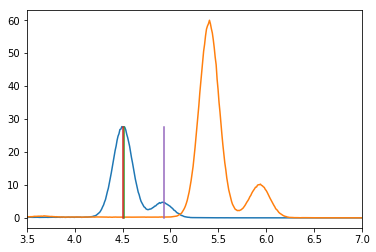

In [67]:
plt.plot(en, inten)
plt.plot(enCr, intenCr)
plt.plot(4.511 * np.ones(2), [0, max(inten)])
plt.plot(4.505 * np.ones(2), [0, max(inten)])
plt.plot([4.932, 4.932], [0, max(inten)])
plt.xlim([3.5,7])

In [188]:
def charshape(x, char, wid, *para):
    return edgeworth((x - char) * wid ** 2, para)

def fitedgeworth(en, inten, char):
    pivot = round(np.interp(char, en, np.arange(len(en))))
    xdata = en[pivot-100:pivot+100]
    ydata = inten[pivot-100:pivot+100]
    def shape(x, wid, *para):
        return charshape(x, char, wid, *para)
    return sp.optimize.curve_fit(shape, xdata, ydata, [.1, 10,0,0,0,0,0]), xdata, ydata

def fitedgeworth2(en, inten, char):
    pivot = np.round(np.interp(char, en, np.arange(len(en))))
    low, upp = int((pivot-100).min()), int((pivot+100).max())
    xdata = en[low:upp]
    ydata = inten[low:upp]
    nparams = 4
    def shape2(x, wid, *para):
        para1 = para[0:nparams]
        wid2 = para[nparams]
        para2 = para[nparams+1:]
        #print('wid', wid, ', para1:', para1, ', wid2:', wid2, ', para2:', para2)
        return charshape(x, char[0], wid, *para1) + charshape(x, char[1], wid2, *para2)
    return sp.optimize.curve_fit(shape2, xdata, ydata, [3, 10,0,0,0, 3,10,0,0,0]), xdata, ydata

In [128]:
fitpara, xdata, ydata = fitedgeworth(en, inten, 4.511)
print(fitpara[0])
fitparaCr, xdataCr, ydataCr = fitedgeworth(enCr, intenCr, 5.415)
print(fitparaCr[0])

[  2.49570781e+00   5.33655065e+01  -6.81555294e-01  -4.11413522e+00
   9.22528255e-01   5.64768860e-01   4.21814195e-02]
[   2.31799568  102.6616556    -2.42061474  -11.05625899    1.76098936
    1.39986398    0.10892469]


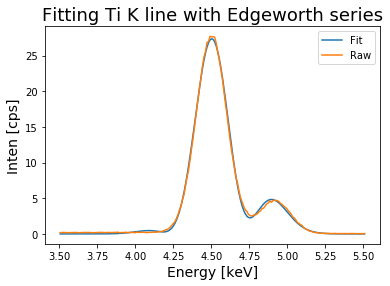

In [129]:
plt.plot(xdata, charshape(np.array(xdata), 4.511, *fitpara[0]), label='Fit')
#plt.plot(xdata, charshape(np.array(xdata), 4.511, *np.array([.1, 7,0,0,0,0]) * 10), label='Initial')
plt.plot(xdata, ydata, label='Raw')
#plt.xlim([2,7])
plt.title('Fitting Ti K line with Edgeworth series', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.legend()
plt.savefig('Ti-edgeworth.png')

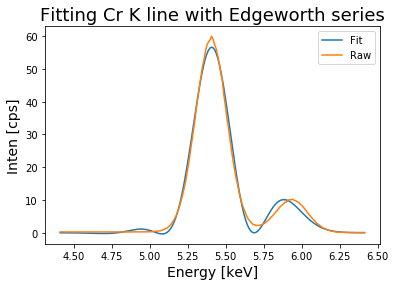

In [126]:
plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *fitparaCr[0]), label='Fit')
#plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *np.array([.1, 7,0,0,0,0]) * 10), label='Initial')
plt.plot(xdataCr, ydataCr, label='Raw')
#plt.xlim([2,7])
plt.title('Fitting Cr K line with Edgeworth series', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.legend()
plt.savefig('Cr-edgeworth.png')

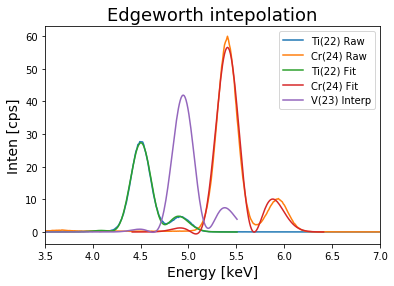

In [118]:
plt.plot(en, inten, label='Ti(22) Raw')
plt.plot(enCr, intenCr, label='Cr(24) Raw')
plt.plot(xdata, charshape(np.array(xdata), 4.511, *fitpara[0]), label='Ti(22) Fit')
plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *fitparaCr[0]), label='Cr(24) Fit')
fitparaV = (fitpara[0] + fitparaCr[0]) / 2
pivotV = round(np.interp(4.952, en, np.arange(len(en))))
xdataV = en[pivot-100:pivot+100]
plt.plot(xdata, charshape(np.array(xdata), 4.952, *fitparaV), label='V(23) Interp')
plt.xlim([3.5,7])
plt.legend()
plt.title('Edgeworth intepolation', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.savefig('edgeworth-intep.png')

In [189]:
fitpara, xdata, ydata = fitedgeworth2(en, inten, [4.511, 4.932])
print(fitpara[0])
fitparaCr, xdataCr, ydataCr = fitedgeworth2(enCr, intenCr, [5.415, 5.947])
print(fitparaCr[0])

[  3.13148225e+00   6.90882198e+01  -3.41717584e+00  -1.07538367e-01
  -2.77287877e-02   3.05119111e+00   1.15320789e+01  -8.76792827e-01
   1.34284203e-02  -1.11295796e-02]
[  3.10173181e+00   1.47186682e+02  -7.58294938e+00   3.93255567e-03
   3.15138000e-03   3.01460619e+00   2.48596477e+01  -1.76161945e+00
  -3.31978910e-02  -4.40471501e-02]


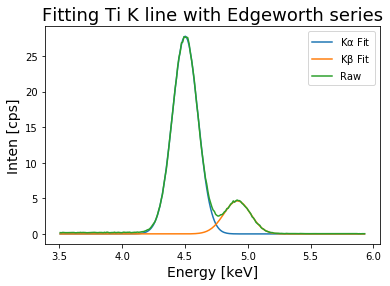

In [194]:
plt.plot(xdata, charshape(np.array(xdata), 4.511, *fitpara[0][0:5]), label=r'$\rm K\alpha$ Fit')
plt.plot(xdata, charshape(np.array(xdata), 4.932, *fitpara[0][5:]), label=r'$\rm K\beta$ Fit')
#plt.plot(xdata, charshape(np.array(xdata), 4.511, *np.array([2.5, 10,0,0,0,0])), label='Initial')
#plt.plot(xdata, charshape(np.array(xdata), 4.932, *np.array([2.5, 10,0,0,0,0])), label='Initial')
plt.plot(xdata, ydata, label='Raw')
#plt.xlim([2,7])
plt.title('Fitting Ti K line with Edgeworth series', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.legend()
plt.savefig('Ti-edgeworth.png')

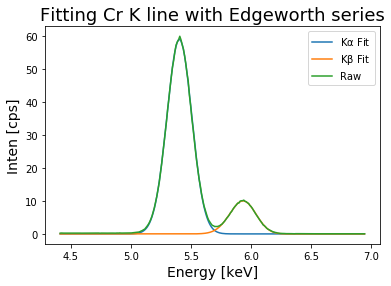

In [196]:
plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *fitparaCr[0][0:5]), label=r'$\rm K\alpha$ Fit')
plt.plot(xdataCr, charshape(np.array(xdataCr), 5.947, *fitparaCr[0][5:]), label=r'$\rm K\beta$ Fit')
#plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *np.array([.1, 7,0,0,0,0]) * 10), label='Initial')
plt.plot(xdataCr, ydataCr, label='Raw')
#plt.xlim([2,7])
plt.title('Fitting Cr K line with Edgeworth series', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.legend()
plt.savefig('Cr-edgeworth.png')

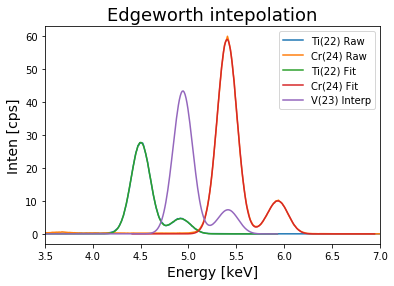

In [187]:
plt.plot(en, inten, label='Ti(22) Raw')
plt.plot(enCr, intenCr, label='Cr(24) Raw')
plt.plot(xdata, charshape(np.array(xdata), 4.511, *fitpara[0][0:5]) + charshape(np.array(xdata), 4.932, *fitpara[0][5:]), label='Ti(22) Fit')
plt.plot(xdataCr, charshape(np.array(xdataCr), 5.415, *fitparaCr[0][0:5]) + charshape(np.array(xdataCr), 5.947, *fitparaCr[0][5:]), label='Cr(24) Fit')
fitparaV = (fitpara[0] + fitparaCr[0]) / 2
pivotV = round(np.interp(4.952, en, np.arange(len(en))))
xdataV = en[pivot-100:pivot+100]
plt.plot(xdata, charshape(np.array(xdata), 4.952, *fitparaV[0:5]) + charshape(np.array(xdata), 5.427, *fitparaV[5:]), label='V(23) Interp')
plt.xlim([3.5,7])
plt.legend()
plt.title('Edgeworth intepolation', fontsize=18)
plt.xlabel('Energy [keV]', fontsize=14)
plt.ylabel('Inten [cps]', fontsize=14)
plt.savefig('edgeworth-intep.png')